In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model

In [2]:
data=pd.read_csv('../Nhom06_PlayerAttributes.csv')
data

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2/18/2016 0:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,11/19/2015 0:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,9/21/2015 0:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,3/20/2015 0:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2/22/2007 0:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183973,183974,102359,39902,8/30/2009 0:00,83.0,85.0,right,medium,low,84.0,...,88.0,83.0,22.0,31.0,30.0,9.0,20.0,84.0,20.0,20.0
183974,183975,102359,39902,2/22/2009 0:00,78.0,80.0,right,medium,low,74.0,...,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183975,183976,102359,39902,8/30/2008 0:00,77.0,80.0,right,medium,low,74.0,...,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183976,183977,102359,39902,8/30/2007 0:00,78.0,81.0,right,medium,low,74.0,...,88.0,53.0,28.0,32.0,30.0,9.0,20.0,73.0,20.0,20.0


In [3]:
df= data[['finishing','curve','free_kick_accuracy', 'ball_control','shot_power', 'penalties']]
df

,finishing,curve,free_kick_accuracy,ball_control,shot_power,penalties
0,44.0,45.0,39.0,49.0,55.0,48.0
1,44.0,45.0,39.0,49.0,55.0,48.0
2,44.0,45.0,39.0,49.0,55.0,48.0
3,43.0,44.0,38.0,48.0,54.0,47.0
4,43.0,44.0,38.0,48.0,54.0,47.0
...,...,...,...,...,...,...
183973,77.0,86.0,78.0,85.0,76.0,83.0
183974,76.0,86.0,74.0,86.0,75.0,70.0
183975,71.0,86.0,74.0,86.0,75.0,70.0
183976,64.0,86.0,73.0,91.0,72.0,53.0


In [5]:
df.isnull().sum()

finishing              836
curve                 2713
free_kick_accuracy     836
ball_control           836
shot_power             836
penalties              836
dtype: int64

In [6]:
complete_df = df[~pd.isna(df).any(axis=1)].reset_index(drop=True) #loại bỏ các giá trị null
complete_df

,finishing,curve,free_kick_accuracy,ball_control,shot_power,penalties
0,44.0,45.0,39.0,49.0,55.0,48.0
1,44.0,45.0,39.0,49.0,55.0,48.0
2,44.0,45.0,39.0,49.0,55.0,48.0
3,43.0,44.0,38.0,48.0,54.0,47.0
4,43.0,44.0,38.0,48.0,54.0,47.0
...,...,...,...,...,...,...
181260,77.0,86.0,78.0,85.0,76.0,83.0
181261,76.0,86.0,74.0,86.0,75.0,70.0
181262,71.0,86.0,74.0,86.0,75.0,70.0
181263,64.0,86.0,73.0,91.0,72.0,53.0


In [7]:
complete_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181265 entries, 0 to 181264
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   finishing           181265 non-null  float64
 1   curve               181265 non-null  float64
 2   free_kick_accuracy  181265 non-null  float64
 3   ball_control        181265 non-null  float64
 4   shot_power          181265 non-null  float64
 5   penalties           181265 non-null  float64
dtypes: float64(6)
memory usage: 8.3 MB


In [8]:
complete_df.describe()

,finishing,curve,free_kick_accuracy,ball_control,shot_power,penalties
count,181265.000000,181265.000000,181265.000000,181265.000000,181265.000000,181265.000000
mean,49.939095,52.965675,49.380327,63.422271,61.842799,54.935950
std,19.047599,18.255788,17.824868,15.200048,16.133940,15.558855
min,1.000000,2.000000,1.000000,5.000000,2.000000,2.000000
25%,34.000000,41.000000,36.000000,59.000000,54.000000,45.000000
50%,53.000000,56.000000,50.000000,67.000000,65.000000,57.000000
75%,65.000000,67.000000,63.000000,73.000000,73.000000,67.000000
max,97.000000,94.000000,97.000000,97.000000,97.000000,96.000000


In [9]:
complete_df.corr()

,finishing,curve,free_kick_accuracy,ball_control,shot_power,penalties
finishing,1.000000,0.691201,0.633218,0.720879,0.727778,0.724922
curve,0.691201,1.000000,0.797411,0.798737,0.694749,0.648502
free_kick_accuracy,0.633218,0.797411,1.000000,0.720739,0.683892,0.668386
ball_control,0.720879,0.798737,0.720739,1.000000,0.774786,0.683320
shot_power,0.727778,0.694749,0.683892,0.774786,1.000000,0.679856
penalties,0.724922,0.648502,0.668386,0.683320,0.679856,1.000000


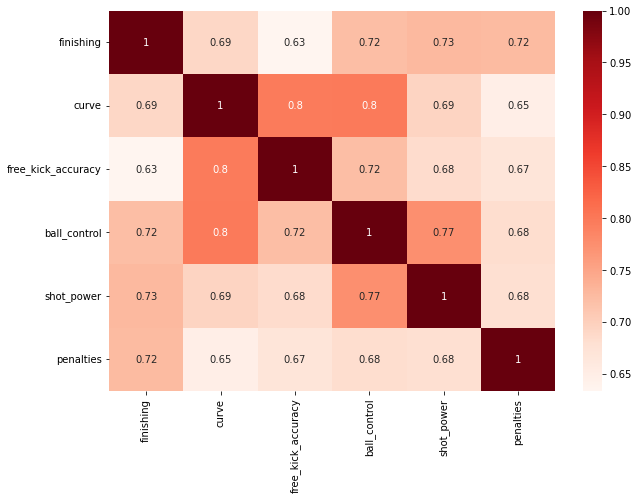

In [10]:
%matplotlib inline
plt.figure(figsize=(10,7))
sns.heatmap(complete_df.corr(), annot=True, cmap=plt.cm.Reds)
plt.show()

In [12]:
X=complete_df[['finishing', 'curve', 'free_kick_accuracy', 'ball_control','shot_power']]
Y=complete_df['penalties'] 

In [13]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
model=lm.fit(X,Y)

In [13]:
pd.DataFrame(model.coef_, X.columns)

,0
finishing,0.310202
curve,-0.016098
free_kick_accuracy,0.216510
ball_control,0.139639
shot_power,0.136233


In [14]:
print('R square:', model.score(X,Y))

R square: 0.6180949463528126


In [15]:
print('slope:', model.coef_)
print('intercept:',model.intercept_)

slope: [ 0.31020239 -0.01609817  0.21651027  0.13963935  0.13623312]
intercept: 12.32474421245243


In [18]:
#Dùng model để dự đoán penalties
Y_pred=model.predict(X)
Y_pred=pd.DataFrame(Y_pred, columns=['penalties_predict'])
#So sánh với penalties thật
compare=pd.concat([X,Y,Y_pred], axis=1)
compare['Deviation']=compare['penalties_predict']-compare['penalties']
compare

,finishing,curve,free_kick_accuracy,ball_control,shot_power,penalties,penalties_predict,Deviation
0,44.0,45.0,39.0,49.0,55.0,48.0,48.028282,0.028282
1,44.0,45.0,39.0,49.0,55.0,48.0,48.028282,0.028282
2,44.0,45.0,39.0,49.0,55.0,48.0,48.028282,0.028282
3,43.0,44.0,38.0,48.0,54.0,47.0,47.241795,0.241795
4,43.0,44.0,38.0,48.0,54.0,47.0,47.241795,0.241795
...,...,...,...,...,...,...,...,...
181260,77.0,86.0,78.0,85.0,76.0,83.0,73.936748,-9.063252
181261,76.0,86.0,74.0,86.0,75.0,70.0,72.763911,2.763911
181262,71.0,86.0,74.0,86.0,75.0,70.0,71.212899,1.212899
181263,64.0,86.0,73.0,91.0,72.0,53.0,69.114469,16.114469


In [19]:
compare['Deviation'].sum() #Tổng độ lệch của kết quả mô hình

-6.434675015043467e-11

In [20]:
X_new=[[76,86,74,86,75],[75,86,74,86,75],[75,86,74,85,74]]
X_new=pd.DataFrame(X_new, columns=['finishing', 'curve', 'free_kick_accuracy', 'ball_control','shot_power'])
penalties_predict=model.predict(X_new)
penalties_predict=pd.DataFrame(penalties_predict, columns=['penalties_predict'])
df_predict=pd.concat([X_new, penalties_predict], axis=1)
df_predict

,finishing,curve,free_kick_accuracy,ball_control,shot_power,penalties_predict
0,76,86,74,86,75,72.763911
1,75,86,74,86,75,72.453708
2,75,86,74,85,74,72.177836
